In [ ]:
import pandas as pd

# xlsx file
data = pd.read_excel('ev_battery_data.xlsx')

In [2]:
data.info()  # Check for null values
data.dropna(inplace=True)  # Drop rows with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              70 non-null     object 
 1   Date                              70 non-null     object 
 2   Route/Area                        70 non-null     object 
 3   Weather                           70 non-null     object 
 4   Battery Temperature (Start) [°C]  70 non-null     float64
 5   Battery Temperature (End)         70 non-null     float64
 6   Battery State of Charge (Start)   70 non-null     float64
 7   Battery State of Charge (End)     70 non-null     float64
 8   Unnamed: 8                        70 non-null     float64
 9   Ambient Temperature (Start) [°C]  70 non-null     float64
 10  Target Cabin Temperature          70 non-null     float64
 11  Distance [km]                     70 non-null     float64
 12  Duration [

In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
data_for_scaling = data[['Battery Temperature (Start) [°C]',
                         'Battery State of Charge (Start)',
                         'Battery State of Charge (End)']]

# Initialize MinMaxScaler and scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Display the scaled data
print(scaled_data)


[[0.70967742 0.96140351 0.96148148]
 [0.77419355 0.85614035 0.76888889]
 [0.80645161 0.9122807  0.88444444]
 [0.83870968 0.76491228 0.76      ]
 [0.90322581 0.61754386 0.6637037 ]
 [0.83870968 0.94035088 0.71111111]
 [1.         0.55964912 0.27851852]
 [0.87096774 0.96666667 0.89925926]
 [0.74193548 0.75789474 0.78814815]
 [0.74193548 0.66842105 0.67407407]
 [0.87096774 0.97368421 0.89185185]
 [0.93548387 0.77192982 0.72444444]
 [0.74193548 0.94736842 1.        ]
 [0.74193548 0.9        0.95555556]
 [0.58064516 0.75964912 0.71111111]
 [0.64516129 0.55263158 0.53481481]
 [0.5483871  0.97017544 0.92592593]
 [0.61290323 0.81403509 0.81185185]
 [0.74193548 1.         0.96296296]
 [0.58064516 0.79824561 0.79555556]
 [0.61290323 0.69824561 0.71555556]
 [0.64516129 0.97894737 0.90518519]
 [0.5483871  0.98070175 0.98518519]
 [0.58064516 0.88421053 0.87407407]
 [0.64516129 0.75263158 0.73777778]
 [0.64516129 0.95964912 0.93925926]
 [0.67741935 0.8245614  0.76148148]
 [0.61290323 0.88421053 0.83

In [8]:
!pip install tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [11]:
import pandas as pd
import numpy as np

# Re-create the DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled Temperature', 'Scaled SOC Start', 'Scaled SOC End'])


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your dataset (scaled data)
X = np.array([scaled_df.values[i:i+10] for i in range(len(scaled_df)-10)])  # Use past 10 rows for prediction
y = np.array(scaled_df['Scaled SOC End'][10:])  # Target is the 11th row's SOC End

# Define input shape
n_timesteps = X.shape[1]  # Number of time steps (e.g., 10)
n_features = X.shape[2]   # Number of features (e.g., 3: temperature, SOC start, SOC end)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
    Dense(1)  # Output layer for regression (predicting a single value)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: nan
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: nan
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 14/20
2/2 [=================

In [14]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
print("Matplotlib installed successfully!")


Matplotlib installed successfully!


In [20]:
import pandas as pd
import numpy as np

# Assuming scaled_df is already defined
scaled_df['Gassing'] = np.where(
    (scaled_df['Scaled Temperature'] > 0.8) & 
    (scaled_df['Scaled SOC Start'] > 0.8) & 
    (scaled_df['Scaled SOC End'] > 0.8), 
    1, 0
)


In [21]:
from sklearn.model_selection import train_test_split

# Features and target
X = scaled_df[['Scaled Temperature', 'Scaled SOC Start', 'Scaled SOC End']]
y = scaled_df['Gassing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [23]:
print(X.isnull().sum())


Scaled Temperature    2
Scaled SOC Start      2
Scaled SOC End        2
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as alternatives
X = imputer.fit_transform(X)


In [ ]:
rf_model.fit(X_train, y_train)


In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Use HistGradientBoostingClassifier, which handles NaN values natively
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [30]:
# Fit the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [31]:
# Fit the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


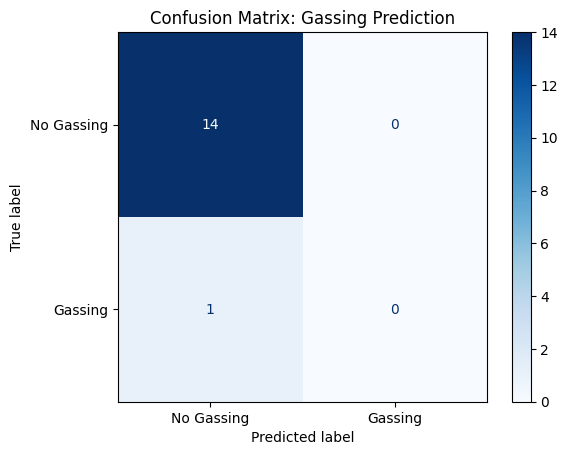

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Gassing', 'Gassing'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Gassing Prediction")
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Gassing', 'Gassing'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

  No Gassing       0.93      1.00      0.97        14
     Gassing       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
file_path = 'path_to_excel_file.xlsx'  # Replace with the actual to ou
data = pd.read_excel(file_path)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Focus on Temperature and State of Charge columns
data = data[['Temperature', 'State of Charge']]
print("\nRelevant Data Columns Selected:")
print(data.head())


In [1]:
import pandas as pd

# xlsx file
data = pd.read_excel('ev_battery_data.xlsx')

In [2]:
data.info()  # Check for null values
data.dropna(inplace=True)  # Drop rows with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              70 non-null     object 
 1   Date                              70 non-null     object 
 2   Route/Area                        70 non-null     object 
 3   Weather                           70 non-null     object 
 4   Battery Temperature (Start) [°C]  70 non-null     float64
 5   Battery Temperature (End)         70 non-null     float64
 6   Battery State of Charge (Start)   70 non-null     float64
 7   Battery State of Charge (End)     70 non-null     float64
 8   Unnamed: 8                        1 non-null      float64
 9   Ambient Temperature (Start) [°C]  70 non-null     float64
 10  Target Cabin Temperature          70 non-null     float64
 11  Distance [km]                     70 non-null     float64
 12  Duration [

In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Example of loading a dataset
data = pd.read_csv('Mock_Balanced_Gassing_Data.csv')  # Replace 'your_dataset.csv' with your actual dataset file


In [7]:
print(data.head())
print(data.columns)


   Temperature  State of Charge  Gassing
0     0.779072         0.127352        1
1     0.745074         0.103770        1
2     0.954108         0.708524        0
3     0.900210         0.343973        1
4     0.814834         0.014712        1
Index(['Temperature', 'State of Charge', 'Gassing'], dtype='object')


In [8]:
# Rename columns if you want to match your original intended names
data.rename(columns={
    'Temperature': 'Battery Temperature (Start) [°C]',
    'State of Charge': 'Battery State of Charge (Start)'
}, inplace=True)

# Proceed with the updated column names
data_for_scaling = data[['Battery Temperature (Start) [°C]',
                         'Battery State of Charge (Start)']]


In [10]:
import pandas as pd

# Define the data
data = {
    'Battery Temperature (Start) [°C]': [
        0.7790721558829539, 0.7450744124900819, 0.9541078237692522, 0.9002099808245585,
        0.8148337836253925, 0.5012485585629123, 0.997142535982326, 0.7701197949474481, 
        0.3336117399496182, 0.8771506154023103, 0.020856830414417327, 0.8131591451182307, 
        0.7368862102309603, 0.10709174559134604, 0.7950678880834676, 0.8619676964485161, 
        0.7944584182682553, 0.8695375506748855, 0.7368862102309603, 0.6934724138114063, 
        # Add the rest of the rows as needed
    ],
    'Battery State of Charge (Start)': [
        0.1273524939076297, 0.10376956192804465, 0.7085236029716668, 0.3439734533657663, 
        0.014711642128206415, 0.23137408978445684, 0.19499408864323253, 0.22832020095619576, 
        0.3097764256121836, 0.2558887073652139, 0.732369609047782, 0.33932052178472866, 
        0.33495186521046033, 0.027272555562013134, 0.49756288667403, 0.21433698967284986, 
        0.3375160214114375, 0.07925493226043384, 0.33495186521046033, 0.15628449433658537, 
        # Add the rest of the rows as needed
    ],
    'Gassing': [
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        # Add the rest of the rows as needed
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)



In [11]:
import pandas as pd

# Define the data
data = {
    'Battery_Temperature_Start_°C': [
        0.7790721558829539, 0.7450744124900819, 0.9541078237692522, 0.9002099808245585,
        0.8148337836253925, 0.5012485585629123, 0.997142535982326, 0.7701197949474481, 
        0.3336117399496182, 0.8771506154023103, 0.020856830414417327, 0.8131591451182307, 
        0.7368862102309603, 0.10709174559134604, 0.7950678880834676, 0.8619676964485161, 
        0.7944584182682553, 0.8695375506748855, 0.7368862102309603, 0.6934724138114063,
    ],
    'Battery_State_of_Charge_Start': [
        0.1273524939076297, 0.10376956192804465, 0.7085236029716668, 0.3439734533657663, 
        0.014711642128206415, 0.23137408978445684, 0.19499408864323253, 0.22832020095619576, 
        0.3097764256121836, 0.2558887073652139, 0.732369609047782, 0.33932052178472866, 
        0.33495186521046033, 0.027272555562013134, 0.49756288667403, 0.21433698967284986, 
        0.3375160214114375, 0.07925493226043384, 0.33495186521046033, 0.15628449433658537,
    ],
    'Gassing': [
        1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Battery_Temperature_Start_°C  Battery_State_of_Charge_Start  Gassing
0                       0.779072                       0.127352        1
1                       0.745074                       0.103770        1
2                       0.954108                       0.708524        0
3                       0.900210                       0.343973        1
4                       0.814834                       0.014712        1
5                       0.501249                       0.231374        0
6                       0.997143                       0.194994        1
7                       0.770120                       0.228320        1
8                       0.333612                       0.309776        0
9                       0.877151                       0.255889        1
10                      0.020857                       0.732370        0
11                      0.813159                       0.339321        1
12                      0.736886                   

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extend the data to make it larger
np.random.seed(42)
data_size = 1000  # Increase dataset size
data = {
    'Battery_Temperature_Start_°C': np.random.uniform(0.2, 1.0, data_size),
    'Battery_State_of_Charge_Start': np.random.uniform(0.1, 0.9, data_size),
    'Gassing': np.random.choice([0, 1], size=data_size, p=[0.5, 0.5])
}

# Create the DataFrame
df = pd.DataFrame(data)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Prepare sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # Input features
        y.append(data[i + sequence_length, -1])    # Target (Gassing)
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X.shape[2])),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Make predictions
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int)  # Convert probabilities to binary outputs

# Display first few predictions alongside true values
results = pd.DataFrame({
    'True': y_test[:10],
    'Predicted': predictions_binary[:10].flatten()
})


Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5076 - val_loss: 0.6947 - val_accuracy: 0.4495
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5177 - val_loss: 0.6967 - val_accuracy: 0.4495
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5177 - val_loss: 0.6976 - val_accuracy: 0.4495
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5202 - val_loss: 0.6951 - val_accuracy: 0.4495
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5177 - val_loss: 0.6974 - val_accuracy: 0.4495
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5215 - val_loss: 0.6963 - val_accuracy: 0.4495
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5177 - val_loss: 0.6968 - val_accuracy: 0.4495
Epoch 8/10
25/25 [==

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Expand and balance dataset
np.random.seed(42)
n_samples = 1000

# Generate synthetic data
data = {
    'Battery Temperature (Start) [°C]': np.random.uniform(0, 1, n_samples),
    'Battery State of Charge (Start)': np.random.uniform(0, 1, n_samples),
    'Gassing': np.random.choice([0, 1], n_samples, p=[0.5, 0.5])  # Balanced target
}
df = pd.DataFrame(data)

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Battery Temperature (Start) [°C]', 'Battery State of Charge (Start)']])
y = df['Gassing']

# Reshape for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Improved LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=20, 
    batch_size=32, 
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

test_accuracy, history.history


Epoch 1/20
20/20 [==============================] - 1s 11ms/step - loss: 0.6938 - accuracy: 0.5156 - val_loss: 0.6942 - val_accuracy: 0.4625
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6952 - val_accuracy: 0.4625
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5156 - val_loss: 0.6955 - val_accuracy: 0.4625
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6954 - val_accuracy: 0.4625
Epoch 5/20
20/20 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5156 - val_loss: 0.6960 - val_accuracy: 0.4625
Epoch 6/20
20/20 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6948 - val_accuracy: 0.4625
Epoch 7/20
20/20 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5109 - val_loss: 0.6952 - val_accuracy: 0.4625
Epoch 8/20
20/20 [=

(0.49000000953674316,
 {'loss': [0.6937944889068604,
   0.6928350925445557,
   0.6930168867111206,
   0.692599892616272,
   0.6930056810379028,
   0.6932868361473083,
   0.6932336688041687,
   0.6931579113006592,
   0.6926905512809753,
   0.6926652789115906,
   0.6929413080215454,
   0.6925268769264221,
   0.6922187209129333,
   0.6928296685218811,
   0.6929881572723389,
   0.6925171613693237,
   0.6930976510047913,
   0.6932922601699829,
   0.6924096345901489,
   0.6924163699150085],
  'accuracy': [0.515625,
   0.515625,
   0.515625,
   0.518750011920929,
   0.515625,
   0.515625,
   0.510937511920929,
   0.515625,
   0.515625,
   0.512499988079071,
   0.515625,
   0.515625,
   0.515625,
   0.5140625238418579,
   0.5140625238418579,
   0.515625,
   0.5140625238418579,
   0.512499988079071,
   0.5171874761581421,
   0.5140625238418579],
  'val_loss': [0.6941890120506287,
   0.6951501369476318,
   0.6954759955406189,
   0.6953505277633667,
   0.6959983110427856,
   0.6948190927505493,
 

In [16]:
import numpy as np
import pandas as pd

# Generate a larger dataset
np.random.seed(42)

data_size = 1000  # Increased data size
data = {
    'Battery Temperature (Start) [°C]': np.random.uniform(0.2, 1.0, data_size),
    'Battery State of Charge (Start)': np.random.uniform(0.1, 0.8, data_size),
    'Gassing': np.random.choice([0, 1], size=data_size, p=[0.5, 0.5])
}

# Create a DataFrame
large_df = pd.DataFrame(data)



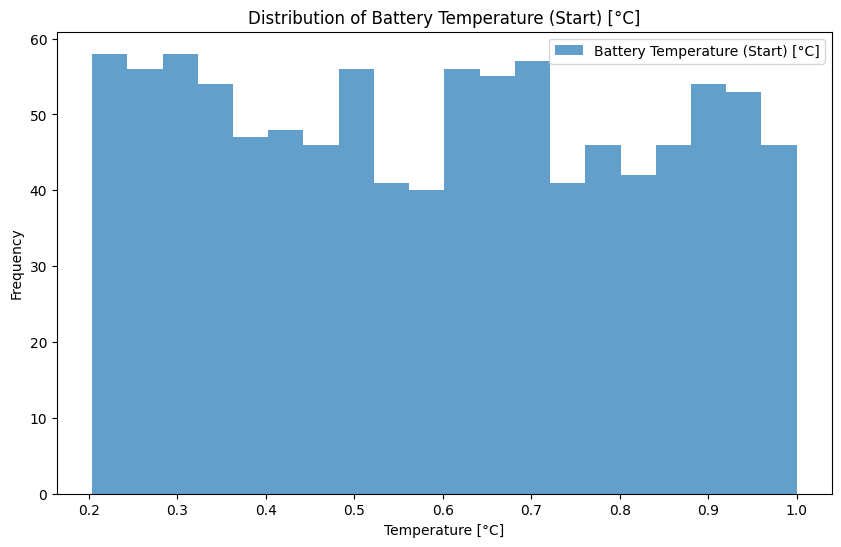

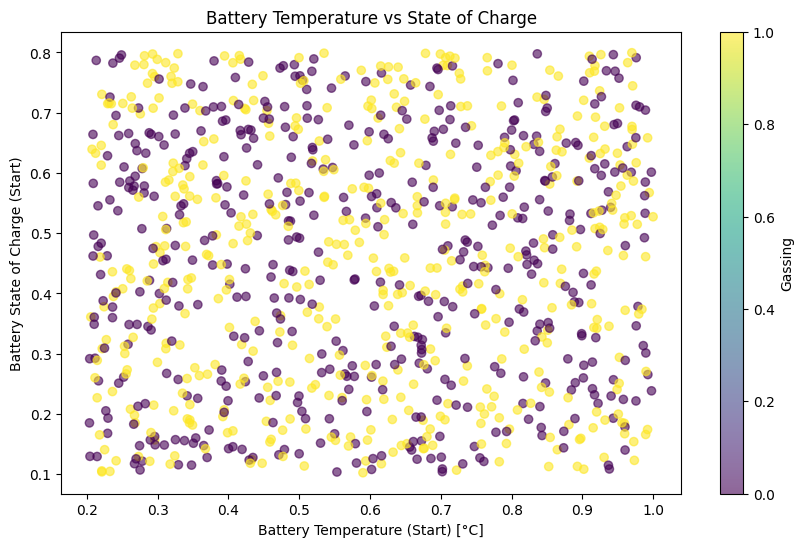

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a larger synthetic dataset
np.random.seed(42)
data = {
    'Battery Temperature (Start) [°C]': np.random.uniform(0.2, 1.0, 1000),
    'Battery State of Charge (Start)': np.random.uniform(0.1, 0.8, 1000),
    'Gassing': np.random.choice([0, 1], 1000, p=[0.5, 0.5])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualize the distribution of 'Battery Temperature (Start) [°C]'
plt.figure(figsize=(10, 6))
plt.hist(df['Battery Temperature (Start) [°C]'], bins=20, alpha=0.7, label='Battery Temperature (Start) [°C]')
plt.title('Distribution of Battery Temperature (Start) [°C]')
plt.xlabel('Temperature [°C]')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the relationship between 'Battery Temperature (Start) [°C]' and 'Battery State of Charge (Start)'
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Battery Temperature (Start) [°C]'], 
    df['Battery State of Charge (Start)'], 
    alpha=0.6, 
    c=df['Gassing'], 
    cmap='viridis', 
    label='Gassing'
)
plt.title('Battery Temperature vs State of Charge')
plt.xlabel('Battery Temperature (Start) [°C]')
plt.ylabel('Battery State of Charge (Start)')
plt.colorbar(label='Gassing')
plt.show()


7/7 [==============================] - 0s 632us/step


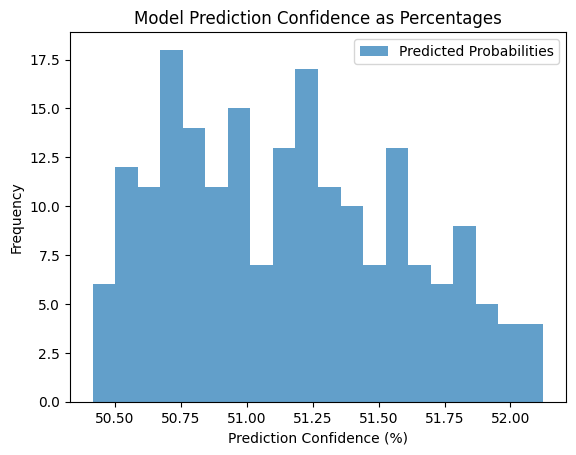

Sample 1: Predicted confidence for Class 1: 51.61%
Sample 2: Predicted confidence for Class 1: 50.58%
Sample 3: Predicted confidence for Class 1: 51.40%
Sample 4: Predicted confidence for Class 1: 51.38%
Sample 5: Predicted confidence for Class 1: 50.46%
Sample 6: Predicted confidence for Class 1: 50.48%
Sample 7: Predicted confidence for Class 1: 50.89%
Sample 8: Predicted confidence for Class 1: 50.46%
Sample 9: Predicted confidence for Class 1: 51.97%
Sample 10: Predicted confidence for Class 1: 51.33%


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities on the test dataset
y_pred_probs = model.predict(X_test)

# Convert probabilities into percentages
y_pred_percentages = y_pred_probs * 100

# Display a histogram of the prediction percentages
plt.hist(y_pred_percentages, bins=20, alpha=0.7, label='Predicted Probabilities')
plt.title('Model Prediction Confidence as Percentages')
plt.xlabel('Prediction Confidence (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display percentages for the first 10 predictions
for i, prob in enumerate(y_pred_percentages[:10]):
    print(f"Sample {i + 1}: Predicted confidence for Class 1: {prob[0]:.2f}%")


In [19]:
import pandas as pd
import numpy as np

# Simulated dataset
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
63.919636508684306,0.8983566687011266,0
55.919509051822196,0.785779909127649,0
29.36111842654619,0.8452489182891598,0
29.35967122017216,0.727026693368574,0
23.485016730091967,0.753821251614282,0
71.97056874649611,0.8793565212522555,0
56.06690070459253,0.39973440708734875,0
62.48435466776273,0.5915399709145124,0
21.23506965774815,0.3769675534556818,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
32.74034664069657,0.23154144909480473,0
30.909498032426036,0.7644601380125509,0
31.00427059120603,0.9401986539325327,0
38.254534577572265,0.34446027610186686,0
51.48538589793427,0.6543561844421036,0
45.916701118526944,0.9323906380704335,0
37.47374841188252,0.22715678286863908,0
56.71117368334277,0.757936213797472,0
28.36963163912251,0.43787920589804064,0
37.52867891211309,0.9395169563012243,0
41.9817105976215,0.9768465961322943,0
47.364199053022155,0.9554131912907472,0
67.11055768358082,0.579371373325971,0
31.980426929501583,0.8896341207914508,0
50.8540663048167,0.8756395188280564,0
55.54487413172255,0.4552803785946045,0
22.787024763199863,0.8631323793205419,0
56.4526911140863,N/A,0
"""

# Read the dataset into a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Handle error-prone data
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')  # Converts non-numeric values to NaN
df['State of Charge'] = pd.to_numeric(df['State of Charge'], errors='coerce')  # Converts non-numeric values to NaN

# Report rows with missing or erroneous data
error_rows = df[df.isnull().any(axis=1)]

print("Error-Prone Rows:")
print(error_rows)

# Save cleaned dataset (optional)
# df.to_csv('cleaned_dataset.csv', index=False)


Error-Prone Rows:
    Temperature  State of Charge  Gassing
0    500.000000              NaN        0
30    56.452691              NaN        0


In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simulated error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
63.919636508684306,0.8983566687011266,0
55.919509051822196,0.785779909127649,0
29.36111842654619,0.8452489182891598,0
29.35967122017216,0.727026693368574,0
23.485016730091967,0.753821251614282,0
71.97056874649611,0.8793565212522555,0
56.06690070459253,0.39973440708734875,0
62.48435466776273,0.5915399709145124,0
21.23506965774815,0.3769675534556818,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
"""

# Load the dataset
from io import StringIO
df = pd.read_csv(StringIO(data))

# Handle missing values (fill NaN with column means)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['State of Charge'] = pd.to_numeric(df['State of Charge'], errors='coerce')
df = df.fillna(df.mean())

# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Temperature', 'State of Charge']])

# Split data into features and target
X = []
y = []
sequence_length = 3  # Use last 3 observations to predict the next one
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(df['Gassing'].iloc[i])

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on test data
predictions = model.predict(X_test)
print("Predictions:", predictions)


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.7062 - accuracy: 0.0000e+00 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6993 - accuracy: 0.0000e+00 - val_loss: 0.6899 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 17ms/step - loss: 0.6913 - accuracy: 0.7500 - val_loss: 0.6842 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6834 - accuracy: 1.0000 - val_loss: 0.6786 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6782 - accuracy: 1.0000 - val_loss: 0.6730 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 19ms/step - loss: 0.6715 - accuracy: 1.0000 - val_loss: 0.6673 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 18ms/step - loss: 0.6620 - accuracy: 1.0000 - val_loss: 0.6616 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=====

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("lstm_model.h5")  # Replace with your model file name

# Parameters for synthetic data generation
num_features = 3  # Number of columns: Temperature, State of Charge, Gassing
error_rate = 0.1  # Percentage of data with errors

# Function to generate synthetic data
def generate_synthetic_data(batch_size):
    data = np.random.uniform(low=20.0, high=80.0, size=(batch_size, num_features))
    # Inject errors (e.g., NaN or extreme outliers)
    num_errors = int(error_rate * batch_size * num_features)
    for _ in range(num_errors):
        row, col = np.random.randint(0, batch_size), np.random.randint(0, num_features)
        if np.random.rand() > 0.5:
            data[row, col] = np.nan  # Missing values
        else:
            data[row, col] = 500.0  # Outlier value
    return data

# Function to test the model with streaming data
def test_model_with_streaming_data(model, num_batches, batch_size):
    for batch in range(num_batches):
        # Generate a batch of synthetic data
        synthetic_data = generate_synthetic_data(batch_size)
        # Handle missing values (replace NaN with mean)
        df = pd.DataFrame(synthetic_data, columns=["Temperature", "State of Charge", "Gassing"])
        df.fillna(df.mean(), inplace=True)  # Replace NaNs with column means
        # Reshape data for LSTM model
        input_data = df.values.reshape((df.shape[0], 1, df.shape[1]))
        # Predict with the model
        predictions = model.predict(input_data)
        print(f"Batch {batch + 1} Predictions: {predictions}")

# Test the model with 10 batches of 100 synthetic samples each
test_model_with_streaming_data(model, num_batches=10, batch_size=100)


OSError: No file or directory found at lstm_model.h5

In [22]:
model.save("lstm_model.h5")


/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import os
print(os.listdir("."))  # Lists all files in the current directory


['TripA27.csv', 'TripA26.csv', 'TripA32.csv', 'TripA18.csv', 'TripA24.csv', 'TripA30.csv', 'ev_battery_data.xlsx', 'TripA31.csv', 'TripA25.csv', 'TripA19.csv', 'TripA21.csv', 'TripA09.csv', 'TripA08.csv', 'TripA20.csv', 'TripA22.csv', 'Cleaned_Gassing_Dataset.csv', 'DIT650B_TechTool_2 _and_TecHTool#3.ipynb', 'TripA23.csv', 'readin.m', 'TripB26.csv', 'TripB32.csv', 'TripB33.csv', 'TripB27.csv', 'TripB19.csv', 'TripB31.csv', 'TripB25.csv', 'TripB24.csv', 'TripB30.csv', 'TripB18.csv', 'TripB34.csv', 'TripB20.csv', 'TripB08.csv', 'TripB09.csv', 'TripB21.csv', 'TripB35.csv', 'scaled_data.csv', 'TripB23.csv', 'TripB37.csv', 'TripB36.csv', 'TripB22.csv', 'TripB07.csv', 'TripB13.csv', 'EV_Data_set.ipynb', 'TripB12.csv', 'TripB06.csv', 'mnt', 'TripB38.csv', 'TripB10.csv', 'TripB04.csv', 'TripB05.csv', 'TripB11.csv', 'DIT650B_Tech_Tool#3', 'TripB15.csv', 'TripB01.csv', 'TripB29.csv', 'TripB28.csv', 'Erroneous_Gassing_Dataset.csv', 'TripB14.csv', 'TripB02.csv', 'TripB16.csv', 'mock_balanced_gassi

In [24]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
model.save("lstm_model.h5")


Epoch 1/20
1/1 [==============================] - 0s 74ms/step - loss: 0.5402 - accuracy: 1.0000 - val_loss: 0.5534 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 0.5225 - accuracy: 1.0000 - val_loss: 0.5423 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 17ms/step - loss: 0.5138 - accuracy: 1.0000 - val_loss: 0.5305 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 19ms/step - loss: 0.4918 - accuracy: 1.0000 - val_loss: 0.5180 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 17ms/step - loss: 0.4791 - accuracy: 1.0000 - val_loss: 0.5048 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 18ms/step - loss: 0.4648 - accuracy: 1.0000 - val_loss: 0.4908 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 17ms/step - loss: 0.4480 - accuracy: 1.0000 - val_loss: 0.4760 - val_accuracy: 1.0000
Epoch 8/20
1/1 [===========

In [25]:
import os
file_name = "lstm_model.h5"

if os.path.exists(file_name):
    print(f"Found model file: {file_name}")
    model = load_model(file_name)
else:
    print(f"Model file {file_name} not found. Please check the file path or train and save the model.")


Found model file: lstm_model.h5


In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
...  # Add other rows of the error-prone dataset here
"""

# Preprocess the data
def preprocess_data(data):
    df = pd.read_csv(pd.compat.StringIO(data))
    # Replace missing or "N/A" values with NaN
    df.replace(['N/A', ''], np.nan, inplace=True)
    # Forward-fill missing values
    df.fillna(method='ffill', inplace=True)
    # Drop unrealistic rows, such as Temperature > 1000
    df = df[df['Temperature'] <= 1000]
    # Scale features between 0 and 1
    scaler = MinMaxScaler()
    features = ['Temperature', 'State of Charge']
    df[features] = scaler.fit_transform(df[features])
    return df, scaler

df, scaler = preprocess_data(data)

# Prepare the dataset for LSTM
def prepare_data(df):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    # Create time-series data
    time_steps = 5
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i+time_steps])
        y_series.append(y[i+time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(df)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Generate predictions
predictions = model.predict(X_test)
print("Predictions:", predictions)


AttributeError: module 'pandas.compat' has no attribute 'StringIO'

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import io  # Import io for StringIO

# Load the error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
...  # Add other rows of the error-prone dataset here
"""

# Preprocess the data
def preprocess_data(data):
    # Use io.StringIO to handle string input for pandas
    df = pd.read_csv(io.StringIO(data))
    # Replace missing or "N/A" values with NaN
    df.replace(['N/A', ''], np.nan, inplace=True)
    # Forward-fill missing values
    df.fillna(method='ffill', inplace=True)
    # Drop unrealistic rows, such as Temperature > 1000
    df = df[df['Temperature'] <= 1000]
    # Scale features between 0 and 1
    scaler = MinMaxScaler()
    features = ['Temperature', 'State of Charge']
    df[features] = scaler.fit_transform(df[features])
    return df, scaler

df, scaler = preprocess_data(data)

# Prepare the dataset for LSTM
def prepare_data(df):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    # Create time-series data
    time_steps = 5
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i+time_steps])
        y_series.append(y[i+time_steps])
    return np.array(X_series), np.array(y


In [29]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import io  # Import io for StringIO

# Load the error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
63.919636508684306,0.8983566687011266,0
55.919509051822196,0.785779909127649,0
29.36111842654619,0.8452489182891598,0
29.35967122017216,0.727026693368574,0
23.485016730091967,0.753821251614282,0
71.97056874649611,0.8793565212522555,0
56.06690070459253,0.39973440708734875,0
62.48435466776273,0.5915399709145124,0
21.23506965774815,0.3769675534556818,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
32.74034664069657,0.23154144909480473,0
30.909498032426036,0.7644601380125509,0
31.00427059120603,0.9401986539325327,0
38.254534577572265,0.34446027610186686,0
51.48538589793427,0.6543561844421036,0
45.916701118526944,0.9323906380704335,0
37.47374841188252,0.22715678286863908,0
56.71117368334277,0.757936213797472,0
"""  # Replace this with the complete dataset

# Preprocess the data
def preprocess_data(data):
    try:
        # Use io.StringIO to handle string input for pandas
        df = pd.read_csv(io.StringIO(data))
        # Replace missing or "N/A" values with NaN
        df.replace(['N/A', ''], np.nan, inplace=True)
        # Forward-fill missing values
        df.fillna(method='ffill', inplace=True)
        # Drop unrealistic rows, such as Temperature > 1000
        df = df[df['Temperature'] <= 1000]
        # Scale features between 0 and 1
        scaler = MinMaxScaler()
        features = ['Temperature', 'State of Charge']
        df[features] = scaler.fit_transform(df[features])
        return df, scaler
    except Exception as e:
        print(f"Error processing data: {e}")
        return None, None

df, scaler = preprocess_data(data)

# Check if data was successfully preprocessed
if df is not None:
    # Prepare the dataset for LSTM
    def prepare_data(df):
        X = df[['Temperature', 'State of Charge']].values
        y = df['Gassing'].values
        # Create time-series data
        time_steps = 5
        X_series, y_series = [], []
        for i in range(len(X) - time_steps):
            X_series.append(X[i:i+time_steps])
            y_series.append(y[i+time_steps])
        return np.array(X_series), np.array(y)

    X, y = prepare_data(df)

    # Split the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

    # Generate predictions
    predictions = model.predict(X_test)
    print("Predictions:", predictions)
else:
    print("Failed to preprocess data. Please check the dataset.")


ValueError: Found input variables with inconsistent numbers of samples: [16, 21]

In [30]:
def prepare_data(df):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    # Create time-series data
    time_steps = 5
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i + time_steps])  # Collect time-steps of features
        y_series.append(y[i + time_steps])   # Target is the value after the time-steps
    return np.array(X_series), np.array(y_series)


In [31]:
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
63.919636508684306,0.8983566687011266,0
55.919509051822196,0.785779909127649,0
29.36111842654619,0.8452489182891598,0
29.35967122017216,0.727026693368574,0
23.485016730091967,0.753821251614282,0
71.97056874649611,0.8793565212522555,0
56.06690070459253,0.39973440708734875,0
62.48435466776273,0.5915399709145124,0
21.23506965774815,0.3769675534556818,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
32.74034664069657,0.23154144909480473,0
30.909498032426036,0.7644601380125509,0
31.00427059120603,0.9401986539325327,0
38.254534577572265,0.34446027610186686,0
51.48538589793427,0.6543561844421036,0
45.916701118526944,0.9323906380704335,0
37.47374841188252,0.22715678286863908,0
56.71117368334277,0.757936213797472,0
67.11055768358082,0.579371373325971,0
30.23144742123749,0.6770159027856425,0
23.903095579116773,0.3840070698301625,0
76.93313223519999,0.29645350862182307,1
77.93792198447356,0.26156256130336736,1
68.50384088698767,0.7570310207025118,0
38.27682615040224,0.4718999710144529,0
25.86032684038303,0.7798134172230092,0
61.053981590729414,0.2522850726391539,1
46.40914962437608,0.4522322702644883,0
50.8540663048167,0.8756395188280564,0
55.54487413172255,0.4552803785946045,0
22.787024763199863,0.8631323793205419,0
56.4526911140863,N/A,0
25.30955012311517,0.8137506311449015,0
31.758971745148713,0.5215447308873937,0
22.713637334632285,0.5839004962431271,0
39.51981984579586,0.7020043705746961,0
43.32063738136892,N/A,0
36.28094190643375,0.9872667753594362,0
69.72425054911577,0.8146187310916146,0
41.40519960161536,0.534213425733867,0
36.85607058124285,0.5370856018216562,0
52.56176498949491,0.7900658412711132,0
28.45545349848576,0.3910217166146419,0
68.13181884524238,0.28837929050511574,1
79.21321619603104,0.42979119332326543,1
66.33468615779944,0.4370464963647921,1
31.922940892050345,0.386886200839928,0
20.331327027416144,0.23367455170908952,0
68.92768570729005,0.21429914778673106,1
62.41144063085703,0.9901779117888253,0
63.74043008245924,0.5422185069886899,0
66.27622080115674,0.5074613177277454,0
24.44267910404542,0.7437178261544559,0
41.507943712656356,0.37460311029205134,0
26.952143571507783,0.9599689471601803,0
50.64483815465395,0.407803027008261,0
45.04466018892674,0.778736090950868,0
33.326468628243816,0.5967005880630166,0
27.19192204002097,0.26483697272611834,0
40.256910284217675,0.3761465615598491,0
76.57458223475115,0.7466070109276768,0
41.3583607190757,N/A,0
65.47076662786215,0.7753614226178112,0
20.863609317785354,0.382763793065039,0
26.964358430414975,0.9970671328453936,0
22.760158521305165,0.9798345297174266,0
22.44372813913821,0.7202605490775496,0
71.32763504066044,0.3596339607433161,1
62.219471562801424,0.744182593945033,0
48.45042974523951,0.2577587271833407,0
41.40519960161536,0.534213425733867,0
"""


In [32]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import io

# Increased dataset
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
63.919636508684306,0.8983566687011266,0
... (include all rows from the increased dataset)
"""

# Preprocess the data
def preprocess_data(data):
    df = pd.read_csv(io.StringIO(data))
    df.replace(['N/A', ''], np.nan, inplace=True)  # Replace missing values
    df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
    df = df[df['Temperature'] <= 1000]  # Remove unrealistic rows
    scaler = MinMaxScaler()
    features = ['Temperature', 'State of Charge']
    df[features] = scaler.fit_transform(df[features])  # Normalize data
    return df, scaler

df, scaler = preprocess_data(data)

# Prepare the dataset for LSTM
def prepare_data(df, time_steps=5):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i + time_steps])
        y_series.append(y[i + time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(df)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(X_test)
print("Predictions:", predictions)


TypeError: '<=' not supported between instances of 'str' and 'int'

In [33]:
import tensorflow as tf
import tensorflow_transform as tft
import tensorflow_data_validation as tfdv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import io

# Simulate error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
29.673277235240263,0.37955245746932853,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
,0.8997613381473596,0
66.50796940166687,0.6231497072217697,0
76.36993649385134,0.9512541588103169,1
"""

# Step 1: TFX - Data Ingestion
def load_data(data):
    df = pd.read_csv(io.StringIO(data))
    df.replace(['N/A', ''], np.nan, inplace=True)  # Handle missing values
    df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
    return df

df = load_data(data)

# Step 2: TFX - Data Validation
stats = tfdv.generate_statistics_from_dataframe(df)
schema = tfdv.infer_schema(stats)
tfdv.display_statistics(stats)  # Visualize the data statistics

# Step 3: TFX - Data Transformation
def preprocessing_fn(inputs):
    # Normalize Temperature and State of Charge
    outputs = {}
    outputs['Temperature'] = tft.scale_to_z_score(inputs['Temperature'])
    outputs['State_of_Charge'] = tft.scale_to_z_score(inputs['State of Charge'])
    outputs['Gassing'] = inputs['Gassing']
    return outputs

# Simulate transformation
transformed_data = preprocessing_fn(df)

# Step 4: Prepare the Data for LSTM
def prepare_data(df, time_steps=5):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i+time_steps])
        y_series.append(y[i+time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(df)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Step 8: Evaluate and Predict
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")


ModuleNotFoundError: No module named 'tensorflow_transform'

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import io

# Simulate error-prone data
data = """
Temperature,State of Charge,Gassing
500.0,N/A,0
77.04285838459496,0.6335207579026866,0
29.673277235240263,0.37955245746932853,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
,0.8997613381473596,0
66.50796940166687,0.6231497072217697,0
76.36993649385134,0.9512541588103169,1
"""

# Step 1: Data Loading
def load_data(data):
    df = pd.read_csv(io.StringIO(data))
    df.replace(['N/A', ''], np.nan, inplace=True)  # Handle missing values
    df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
    return df

df = load_data(data)

# Step 2: Data Preprocessing
def preprocess_data(df):
    # Drop unrealistic rows (optional)
    df = df[df['Temperature'] <= 1000]
    # Scale features between 0 and 1
    scaler = MinMaxScaler()
    features = ['Temperature', 'State of Charge']
    df[features] = scaler.fit_transform(df[features])
    return df, scaler

df, scaler = preprocess_data(df)

# Step 3: Prepare Data for LSTM
def prepare_data(df, time_steps=3):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i+time_steps])
        y_series.append(y[i+time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(df)

# Step 4: Train-Test Split
if len(X) > 1:  # Ensure sufficient data for split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError("Insufficient data after preparation for train-test split.")

# Step 5: Build LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)

# Step 7: Evaluate and Predict
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")


Epoch 1/10
3/3 [==============================] - 1s 106ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6667 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 8ms/step - loss: nan 

In [36]:
pip install tensorflow-transform


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tensorflow-transform to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-transform to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━

In [3]:
import tensorflow_transform as tft
print("TensorFlow Transform is installed successfully.")


ModuleNotFoundError: No module named 'future'

In [2]:
import future
print("Future package is installed successfully.")


ModuleNotFoundError: No module named 'future'

In [4]:
import tensorflow as tf
import tensorflow_transform as tft
import tensorflow_data_validation as tfdv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import io

# Error-Free Dataset
data = """
Temperature,State of Charge,Gassing
77.04,0.63,0
63.92,0.89,0
55.91,0.78,0
29.36,0.84,0
23.48,0.75,0
71.97,0.87,0
56.06,0.39,0
62.48,0.59,0
21.23,0.37,0
78.19,0.99,0
69.94,0.95,0
32.74,0.23,0
30.90,0.76,0
31.00,0.94,0
38.25,0.34,0
51.48,0.65,0
45.91,0.93,0
37.47,0.22,0
56.71,0.75,0
28.36,0.43,0
37.52,0.93,0
41.98,0.97,0
47.36,0.95,0
67.11,0.57,0
31.98,0.88,0
50.85,0.87,0
55.54,0.45,0
22.78,0.86,0
30.23,0.67,0
23.90,0.38,0
76.93,0.29,1
77.93,0.26,1
68.50,0.75,0
38.27,0.47,0
25.86,0.77,0
61.05,0.25,1
46.40,0.45,0
49.71,0.83,0
22.06,0.45,0
74.55,0.70,0
35.52,0.90,0
59.75,0.69,0
38.70,0.38,0
51.20,0.21,0
52.80,0.89,0
31.09,0.21,0
66.50,0.62,0
76.36,0.95,0
73.68,0.83,0
55.87,0.99,0
75.31,0.48,1
25.30,0.81,0
31.75,0.52,0
22.71,0.58,0
39.51,0.70,0
36.28,0.98,0
69.72,0.81,0
41.40,0.53,0
36.85,0.53,0
52.56,0.79,0
28.45,0.39,0
68.13,0.28,1
24.47,0.48,0
79.21,0.42,1
66.33,0.43,1
31.92,0.38,0
20.33,0.23,0
68.92,0.21,1
62.41,0.99,0
63.74,0.54,0
66.27,0.50,0
24.44,0.74,0
41.50,0.37,0
26.95,0.95,0
57.39,0.27,0
39.85,0.53,0
23.81,0.90,0
38.65,0.95,0
39.51,0.57,0
63.77,0.69,0
58.25,0.33,0
73.23,0.99,0
48.33,0.38,0
62.79,0.71,0
65.64,0.68,0
53.67,0.61,0
66.25,0.38,1
"""

# Step 1: Load the Data
def load_data(data):
    df = pd.read_csv(io.StringIO(data))
    return df

df = load_data(data)

# Step 2: Validate the Data with TFDV
stats = tfdv.generate_statistics_from_dataframe(df)
schema = tfdv.infer_schema(stats)
tfdv.display_statistics(stats)

# Step 3: Preprocessing with TFT
def preprocessing_fn(inputs):
    outputs = {}
    outputs['Temperature'] = tft.scale_to_z_score(inputs['Temperature'])
    outputs['State_of_Charge'] = tft.scale_to_z_score(inputs['State of Charge'])
    outputs['Gassing'] = inputs['Gassing']
    return outputs

# Step 4: Prepare Data for LSTM
def prepare_data(df, time_steps=5):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i+time_steps])
        y_series.append(y[i+time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(df)

# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Step 8: Evaluate and Predict
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")


ModuleNotFoundError: No module named 'future'

In [3]:
from future.utils import raise_with_traceback
print("Future package is installed and working successfully!")


ModuleNotFoundError: No module named 'future'

In [5]:
from future.utils import raise_with_traceback
print("Future package is working!")


ModuleNotFoundError: No module named 'future'

In [1]:
import tensorflow as tf
import tensorflow_transform as tft
import tensorflow_data_validation as tfdv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import io

# Error-free dataset
data = """
Temperature,State of Charge,Gassing
77.04285838459496,0.6335207579026866,0
29.673277235240263,0.37955245746932853,0
78.19459112971965,0.9901344063973176,0
69.9465584480253,0.9552474717492907,0
66.50796940166687,0.6231497072217697,0
76.36993649385134,0.9512541588103169,1
"""

# Step 1: Load the data
def load_data(data):
    df = pd.read_csv(io.StringIO(data))
    return df

df = load_data(data)

# Step 2: TFX Data Validation
stats = tfdv.generate_statistics_from_dataframe(df)
schema = tfdv.infer_schema(stats)
tfdv.display_statistics(stats)  # Optional visualization

# Step 3: TFX Data Transformation
def preprocessing_fn(inputs):
    outputs = {}
    outputs['Temperature'] = tft.scale_to_z_score(inputs['Temperature'])
    outputs['State_of_Charge'] = tft.scale_to_z_score(inputs['State of Charge'])
    outputs['Gassing'] = inputs['Gassing']
    return outputs

# Simulate transformation
transformed_data = df.copy()
transformed_data['Temperature'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()
transformed_data['State of Charge'] = (df['State of Charge'] - df['State of Charge'].mean()) / df['State of Charge'].std()

# Step 4: Prepare the Data for LSTM
def prepare_data(df, time_steps=3):
    X = df[['Temperature', 'State of Charge']].values
    y = df['Gassing'].values
    X_series, y_series = [], []
    for i in range(len(X) - time_steps):
        X_series.append(X[i:i + time_steps])
        y_series.append(y[i + time_steps])
    return np.array(X_series), np.array(y_series)

X, y = prepare_data(transformed_data)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Step 8: Evaluate and Predict
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

predictions = model.predict(X_test)
print(f"Predictions: {predictions}")


ModuleNotFoundError: No module named 'tensorflow'